The examples used in this notebook are drawn from this tutorial by PRASHANT BANERJEE :

https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python/notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns 

Import the data.

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.head(1)

,Month,#Passengers
0,1949-01,112


Rename the variables.

In [3]:
df.columns = ["Date","Number of Passengers"]
df.head(1)

,Date,Number of Passengers
0,1949-01,112


### Visualizing the data.

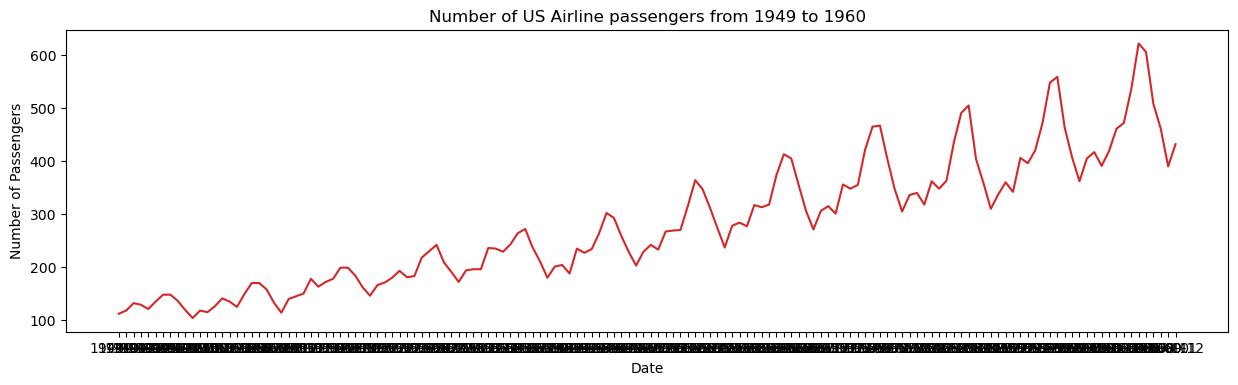

In [4]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

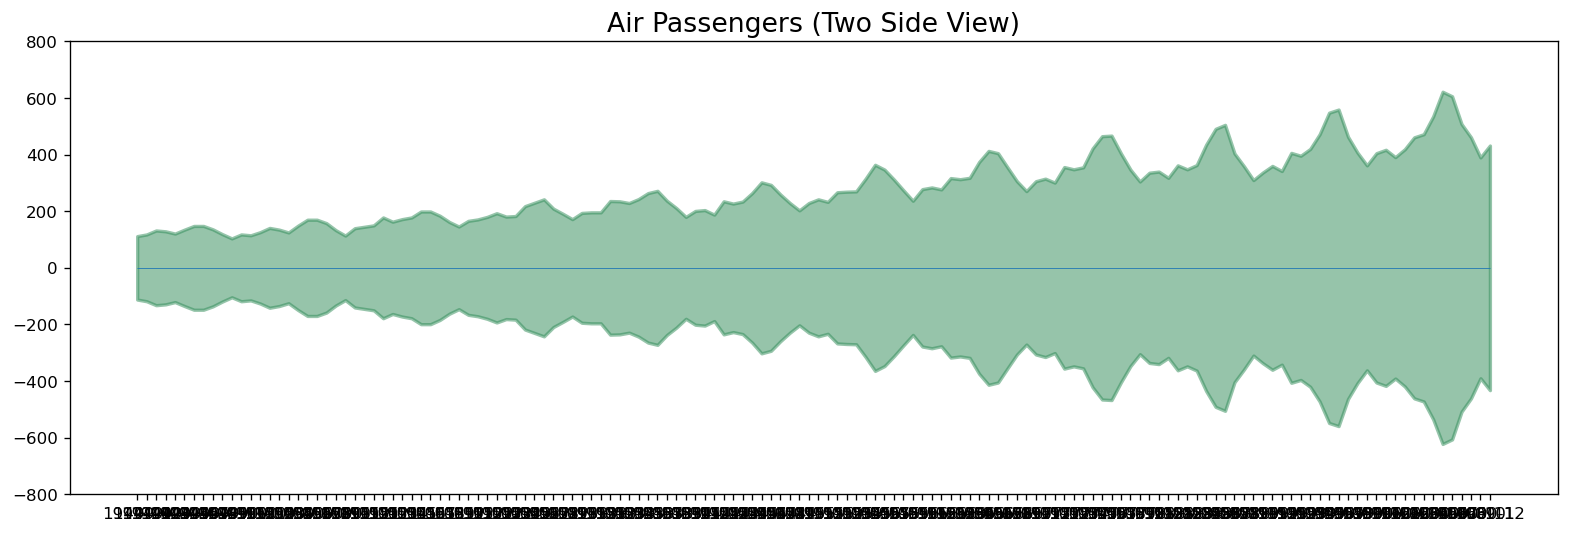

In [5]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

###  Patterns in a Time Series  

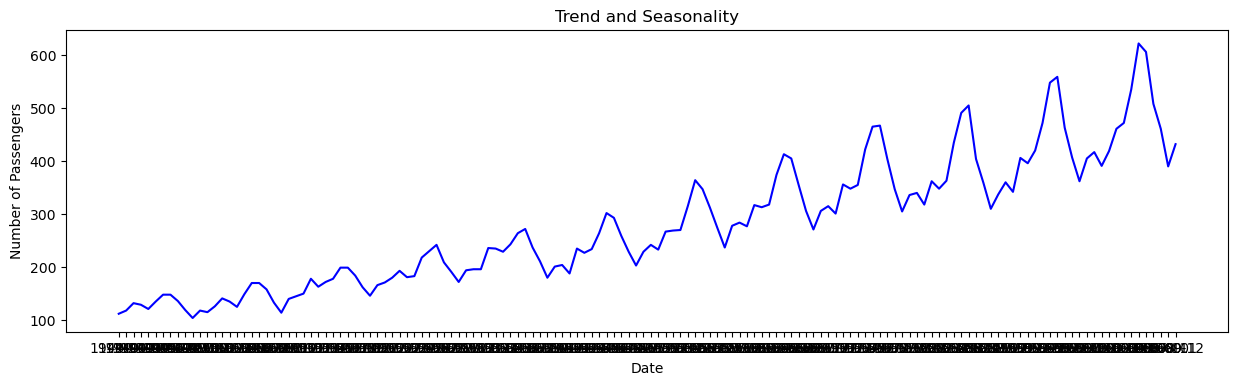

In [6]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Trend and Seasonality')

### Decomposing a Time Series

Additive vs Multiplicative models:

Additive time series: In this model, the behavior is linear; changes over time are consistently made by the same amount, like a linear trend.

Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series: It is not linear; it can be exponential or quadratic. Unlike the additive model, the multiplicative model has an increasing or decreasing amplitude and/or frequency over time.

Value = Base Level x Trend x Seasonality x Error



More about decomposition here: https://online.stat.psu.edu/stat510/lesson/5/5.1

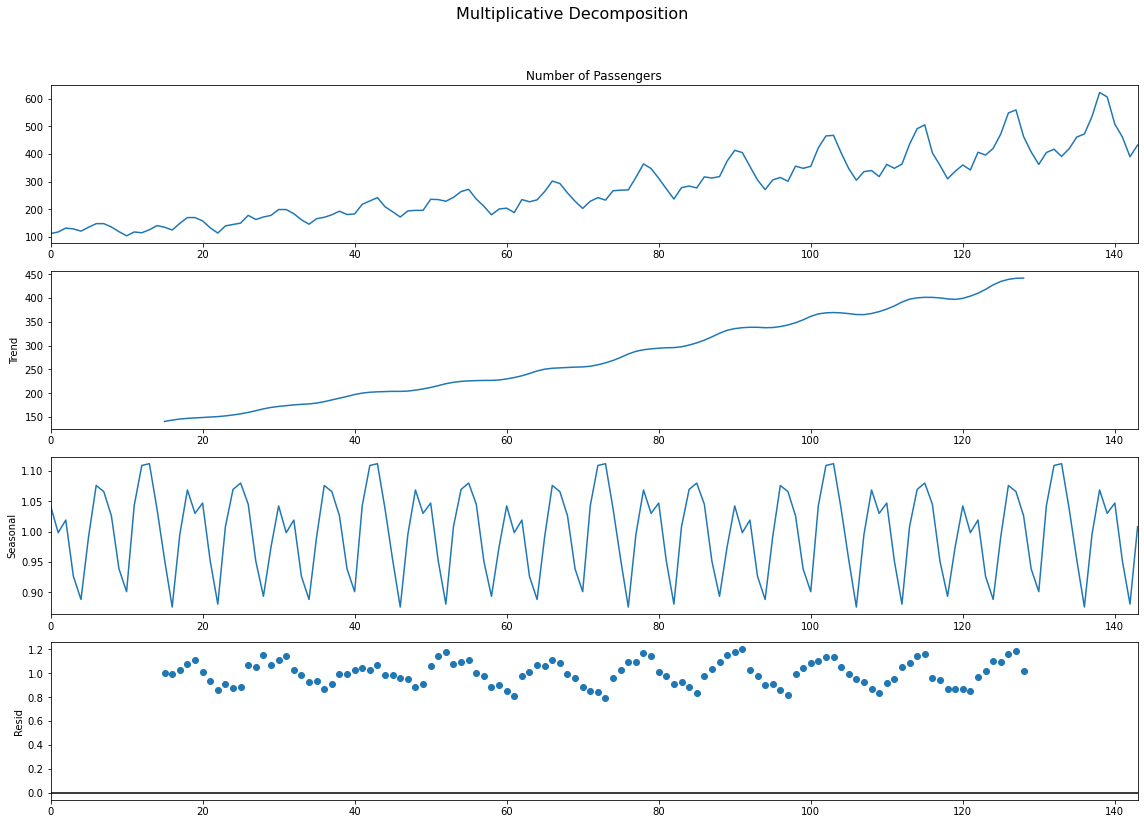

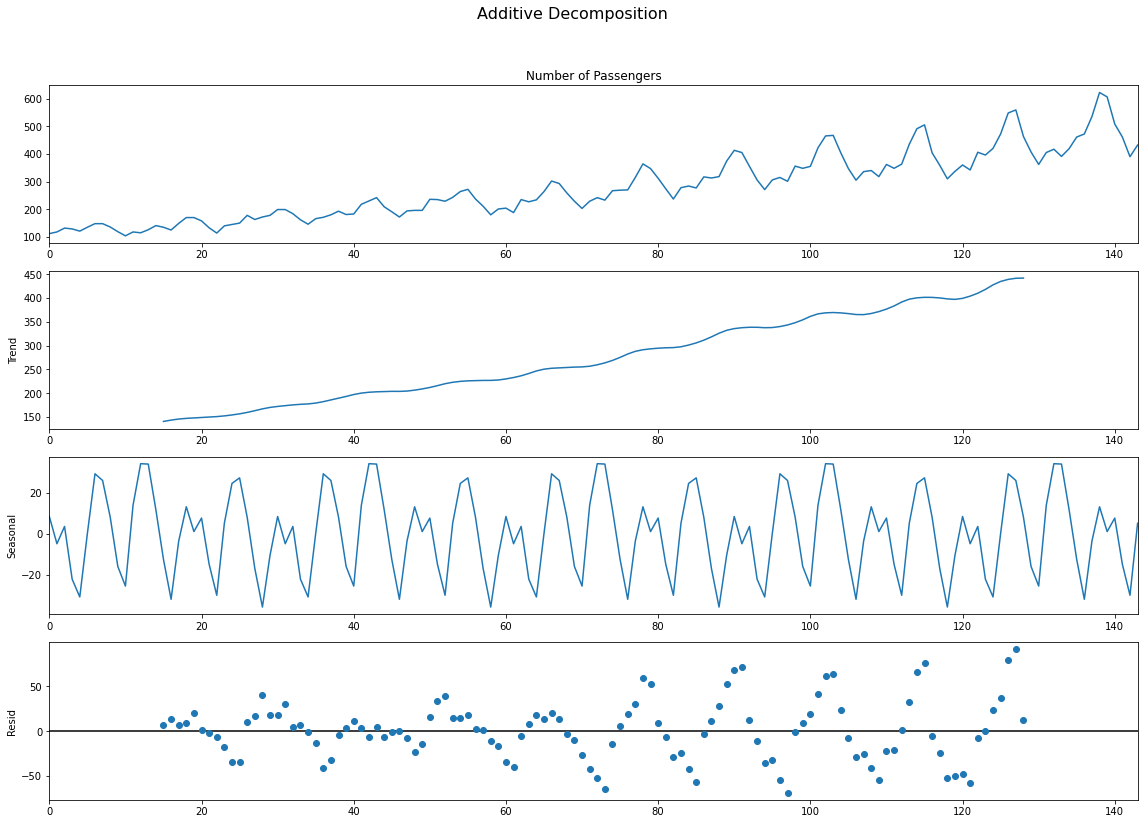

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

White noise.

<AxesSubplot:title={'center':'Random White Noise'}>

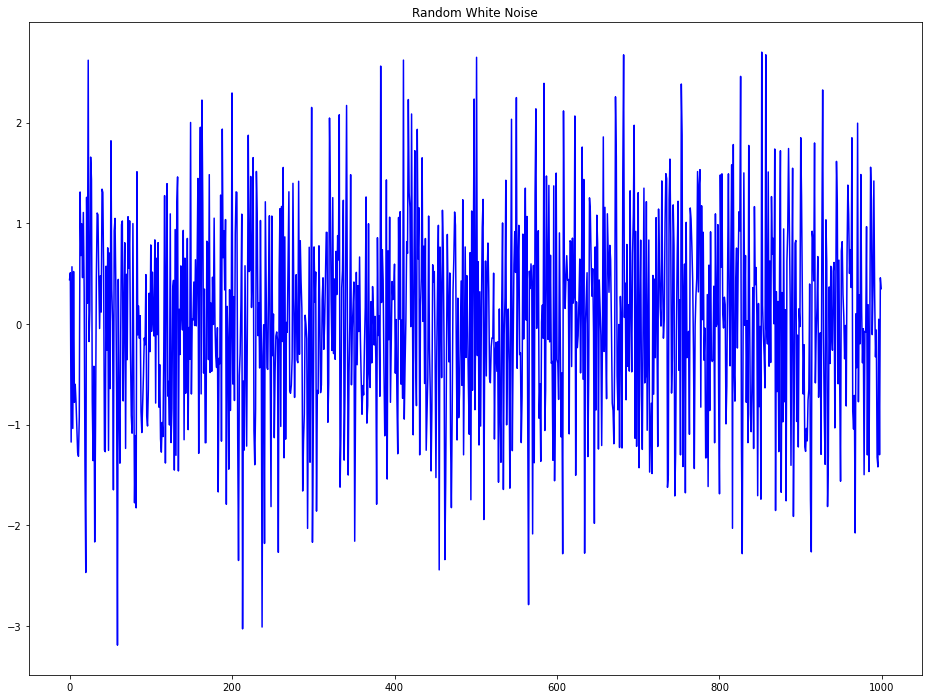

In [8]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')

Important notes:

Stationarity is a property of a time series where the values of the series are not a function of time. So, the values are independent of time. The statistical properties of the series (i.e., mean, variance and autocorrelation) are constant over time.

Most statistical forecasting methods are designed to work with a stationary time series. Thus, it is desirable to convert any non-stationary time series into a stationary one by applying a suitable transformation. Different methods to convert a non-stationary into a stationary one can be distinguised. These methods include: Differencing the series (once or more); taking the log of the series; taking the nth root of the series; or a combination of these methods.

### Detrending a time series

Detrending a time series refers to the removal of the trend component from the time series. Different approaches of accomplishing this task include the following:

- Subtracting the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, we may want to use quadratic terms (x^2) in the model.

- Subtracting the trend component obtained from time series decomposition.

- Subtracting the mean.

- Applying a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

In the example below, we implement the first two methods -- Subtracting the line of best fit and Subtracting the trend component.

Subtracting the line of best fit

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

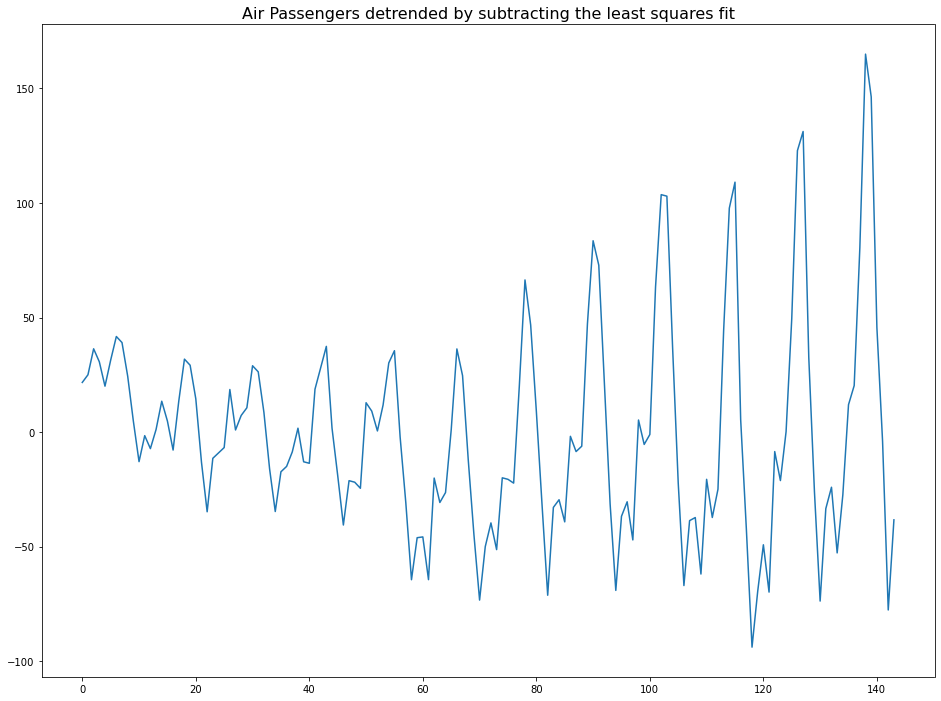

In [9]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)

Subtracting the Trend Component

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

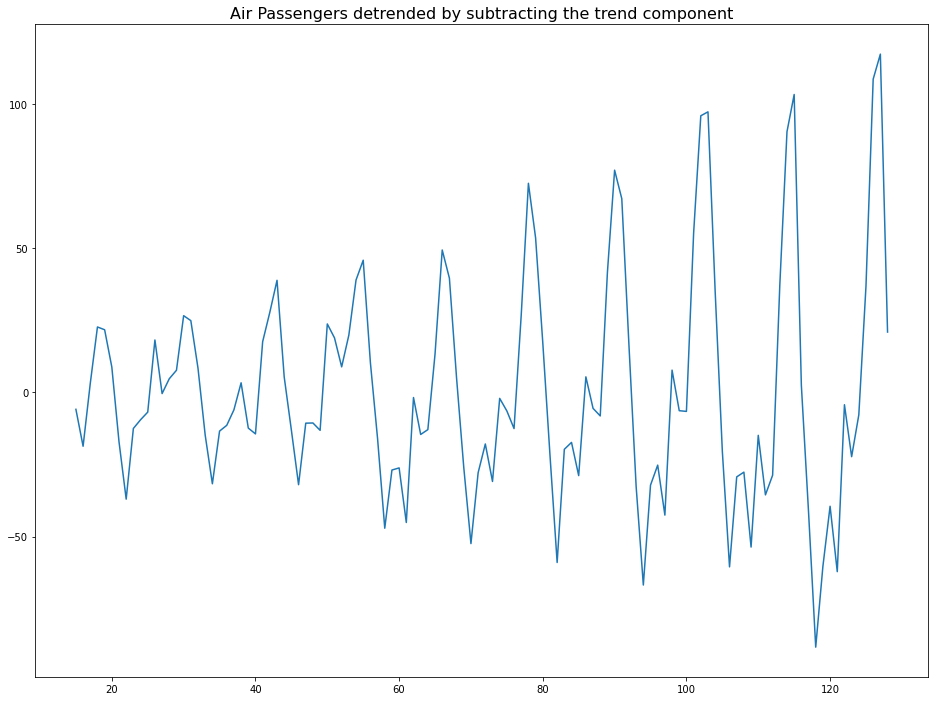

In [10]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)
detrended = df['Number of Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)

### Deseasonalizing a Time Series

Approaches to deseasonalize a time series include the following:

- Taking a moving average with length as the seasonal window. This will smoothen in series in the process.
- Taking the seasonal difference the series (i.e., subtracting the value of previous season from the current value).
- Dividing the series by the seasonal index obtained from STL decomposition.

If dividing by the seasonal index does not work well, we will take a log of the series and then do the deseasonalizing. We will later restore to the original scale by taking an exponential.

[]

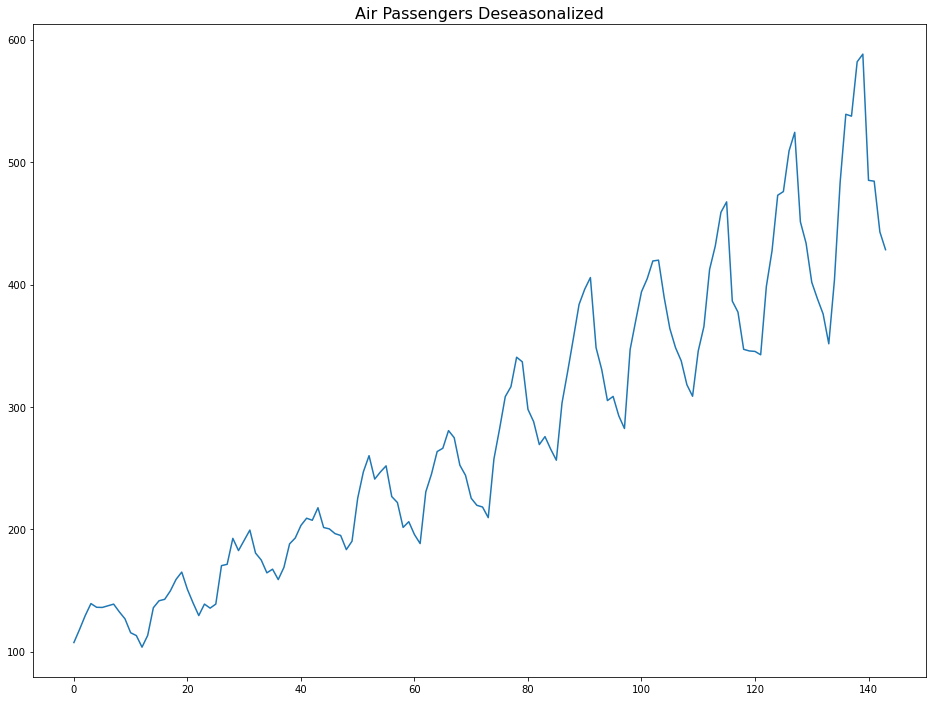

In [11]:
# Subtracting the Trend Component

# Time Series Decomposition
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Deseasonalize
deseasonalized = df['Number of Passengers'].values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

### Testing for seasonality of a time series

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

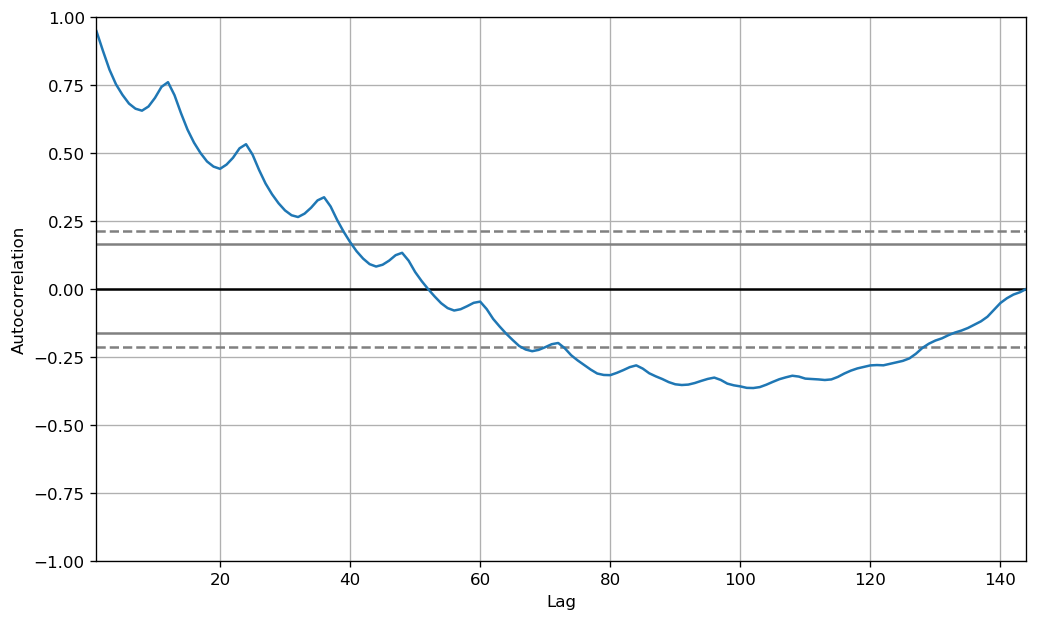

In [12]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Number of Passengers'].tolist())

C:\Users\vaca1\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


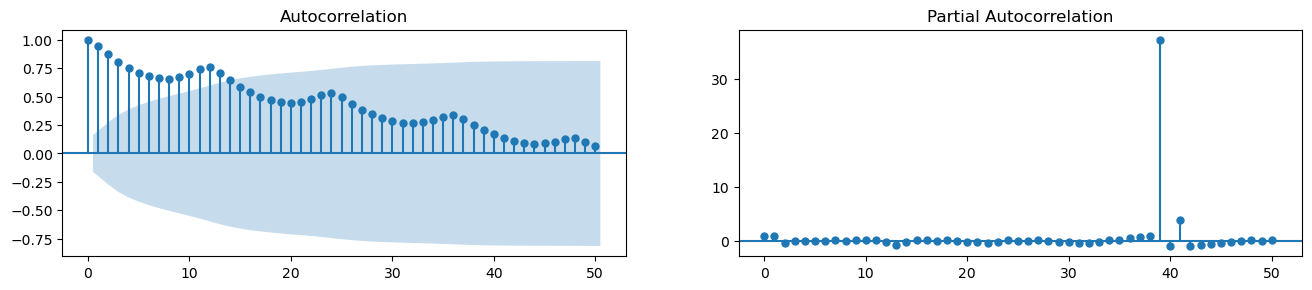

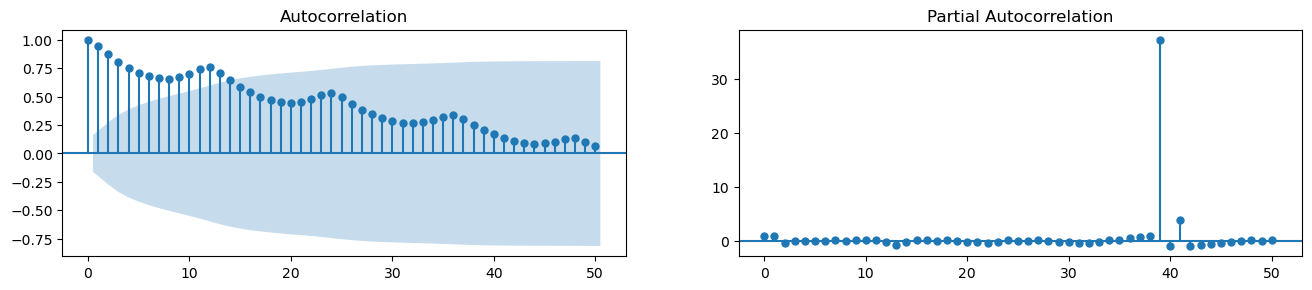

In [13]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=axes[1])

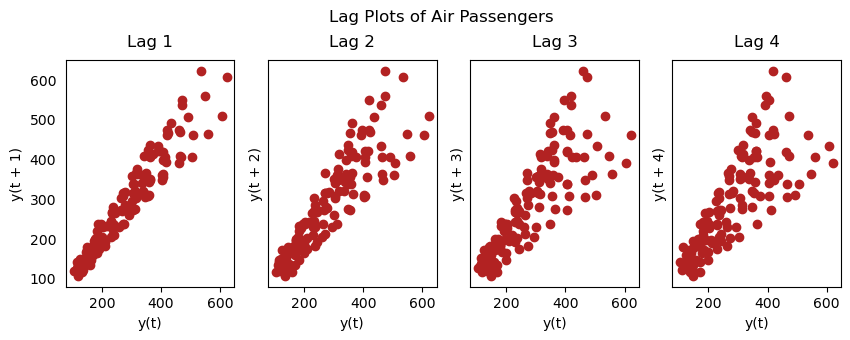

In [14]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()

In [15]:
# from statsmodels.tsa.stattools import grangercausalitytests
# data = pd.read_csv('/kaggle/input/dataset/dataset.txt')
# data['date'] = pd.to_datetime(data['date'])
# data['month'] = data.date.dt.month
# grangercausalitytests(data[['value', 'month']], maxlag=2)

Useful resources:
- https://otexts.com/fpp2/stationarity.html
- https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python/notebook